In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from skimage import exposure
from skimage.util import random_noise
from skimage import transform
import glob
import random

In [10]:
import numpy as np
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

In [17]:
z1 = cv2.imread('/Users/waranthornchansawang/Desktop/xxx/arm/AD/AD_arm_37.jpg')
z1 = clipped_zoom(z1, 2)

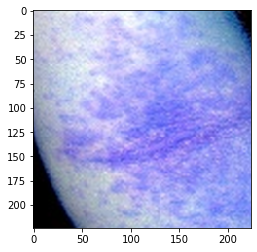

In [18]:
plt.imshow(z1)

In [8]:
src_path = '/Users/waranthornchansawang/Desktop/xxx/arm/AD/AD_arm_30.jpg'
out_path = '/Users/waranthornchansawang/Desktop/xxx/ccc/arm_{}_{}.jpg'

In [11]:
#zoom(src_path, 1.2)